Chocolate Sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

Настройки для более красивых графиков:

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.family'] = 'DejaVu Sans'

Загрузка данных:

In [4]:
df = pd.read_csv('Chocolate Sales.csv')

In [5]:
print("Структура данных:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

Структура данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB
None

Первые 5 строк:
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipp

Преобразование данных:

In [6]:
def clean_amount(amount):
    return float(re.sub(r'[$,\s]', '', amount))
df['Amount'] = df['Amount'].apply(clean_amount)

df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

months = {1:'Янв', 2:'Фев', 3:'Мар', 4:'Апр', 5:'Май', 6:'Июн', 
          7:'Июл', 8:'Авг', 9:'Сен', 10:'Окт', 11:'Ноя', 12:'Дек'}
df['Month_Name'] = df['Month'].map(months)

print("\nСтатистика по числовым данным:")
print(df.describe())


Статистика по числовым данным:
                                Date        Amount  Boxes Shipped  \
count                           1094   1094.000000    1094.000000   
mean   2022-05-03 09:04:56.160877568   5652.308044     161.797989   
min              2022-01-03 00:00:00      7.000000       1.000000   
25%              2022-03-02 00:00:00   2390.500000      70.000000   
50%              2022-05-11 00:00:00   4868.500000     135.000000   
75%              2022-07-04 00:00:00   8027.250000     228.750000   
max              2022-08-31 00:00:00  22050.000000     709.000000   
std                              NaN   4102.442014     121.544145   

             Month    Year  
count  1094.000000  1094.0  
mean      4.576782  2022.0  
min       1.000000  2022.0  
25%       3.000000  2022.0  
50%       5.000000  2022.0  
75%       7.000000  2022.0  
max       8.000000  2022.0  
std       2.316465     0.0  


Посмотрим уникальные значения категориальных переменных:

In [7]:
print("\nУникальные страны:", df['Country'].unique())
print("Количество продавцов:", df['Sales Person'].nunique())
print("Количество продуктов:", df['Product'].nunique())


Уникальные страны: ['UK' 'India' 'Australia' 'New Zealand' 'USA' 'Canada']
Количество продавцов: 25
Количество продуктов: 22


Создадим более точные категории продуктов на основе полного списка имеющихся продуктов:

In [8]:
# Темный шоколад
df.loc[df['Product'].str.contains('85%|99%|70%|50% Dark|Dark & Pure|Dark Bars|Dark Bites'), 'Category'] = 'Темный шоколад'

# Ореховый шоколад
df.loc[df['Product'].str.contains('Peanut|Nut|Almond'), 'Category'] = 'Ореховый шоколад'

# Фруктовый шоколад
df.loc[df['Product'].str.contains('Mint|Orange|Fruit|Raspberry|After Nines'), 'Category'] = 'Фруктовый шоколад'

# Молочный шоколад
df.loc[df['Product'].str.contains('Milk|Smooth|Silky|Sliky'), 'Category'] = 'Молочный шоколад'

# Специальные сорта
df.loc[df['Product'].str.contains('Spicy|Manuka|Honey|Organic|Syrup'), 'Category'] = 'Специальные сорта'

# Белый шоколад
df.loc[df['Product'].str.contains('White'), 'Category'] = 'Белый шоколад'

# Шоколадные кусочки и чипсы
df.loc[df['Product'].str.contains('Chip|Chips|Bites'), 'Category'] = 'Шоколадные кусочки'

# Десертный шоколад
df.loc[df['Product'].str.contains('Eclairs|Caramel|Stuffed'), 'Category'] = 'Десертный шоколад'

# Питьевой шоколад
df.loc[df['Product'].str.contains('Coco|Drinking'), 'Category'] = 'Питьевой шоколад'

Проверка:

In [9]:
uncategorized = df[df['Category'] == 'Другое']['Product'].unique()
if len(uncategorized) > 0:
    print(f"Внимание: {len(uncategorized)} продуктов остались в категории 'Другое': {uncategorized}")

Общая статистика продаж по странам:

In [10]:
print("\n1. Анализ продаж по странам:")
country_sales = df.groupby('Country').agg({
    'Amount': ['sum', 'mean', 'count'], 
    'Boxes Shipped': ['sum', 'mean']
})
country_sales.columns = ['Общий доход', 'Средний чек', 'Количество продаж', 'Всего коробок', 'Среднее коробок']
print(country_sales.sort_values('Общий доход', ascending=False))


1. Анализ продаж по странам:
             Общий доход  Средний чек  Количество продаж  Всего коробок  \
Country                                                                   
Australia      1137367.0  5548.131707                205          32647   
UK             1051792.0  5908.943820                178          30265   
India          1045800.0  5683.695652                184          29470   
USA            1035349.0  5784.072626                179          26824   
Canada          962899.0  5502.280000                175          31221   
New Zealand     950418.0  5493.745665                173          26580   

             Среднее коробок  
Country                       
Australia         159.253659  
UK                170.028090  
India             160.163043  
USA               149.854749  
Canada            178.405714  
New Zealand       153.641618  


Анализ популярности продуктов по странам:

In [13]:
top_products_by_country = df.groupby(['Country', 'Product']).agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).reset_index()

for country in df['Country'].unique():
    top_products = top_products_by_country[top_products_by_country['Country'] == country].sort_values('Amount', ascending=False).head(3)
    print(f"\n{country}:")
    for _, row in top_products.iterrows():
        print(f"  - {row['Product']}: ${row['Amount']:,.2f} ({row['Boxes Shipped']} коробок)")


UK:
  - Peanut Butter Cubes: $79,695.00 (1265 коробок)
  - 99% Dark & Pure: $79,100.00 (1396 коробок)
  - Smooth Sliky Salty: $75,628.00 (1865 коробок)

India:
  - Eclairs: $79,009.00 (1985 коробок)
  - Peanut Butter Cubes: $76,909.00 (1445 коробок)
  - Smooth Sliky Salty: $76,041.00 (722 коробок)

Australia:
  - 50% Dark Bites: $89,222.00 (3182 коробок)
  - Eclairs: $64,323.00 (1331 коробок)
  - Milk Bars: $61,173.00 (1821 коробок)

New Zealand:
  - Mint Chip Choco: $86,709.00 (2537 коробок)
  - 85% Dark Bars: $67,550.00 (1750 коробок)
  - Eclairs: $60,319.00 (890 коробок)

USA:
  - Raspberry Choco: $83,524.00 (1497 коробок)
  - Manuka Honey Choco: $67,732.00 (1150 коробок)
  - White Choc: $67,221.00 (1204 коробок)

Canada:
  - Smooth Sliky Salty: $68,257.00 (2271 коробок)
  - Peanut Butter Cubes: $62,181.00 (1492 коробок)
  - 70% Dark Bites: $59,024.00 (1578 коробок)


Анализ сезонности продаж по категориям продуктов:

In [15]:
category_totals = df.groupby('Category').agg({
    'Amount': 'sum',
    'Boxes Shipped': 'sum'
}).sort_values('Amount', ascending=False)
print(category_totals)

                       Amount  Boxes Shipped
Category                                    
Шоколадные кусочки  1086904.0          33012
Фруктовый шоколад   1041362.0          30842
Специальные сорта    863695.0          24215
Ореховый шоколад     843864.0          21504
Молочный шоколад     618940.0          17140
Темный шоколад       599025.0          15920
Десертный шоколад    544033.0          17474
Белый шоколад        329147.0           8240
Питьевой шоколад     256655.0           8660


ВИЗУАЛИЗАЦИЯ ДАННЫХ

1. Доля продаж по странам

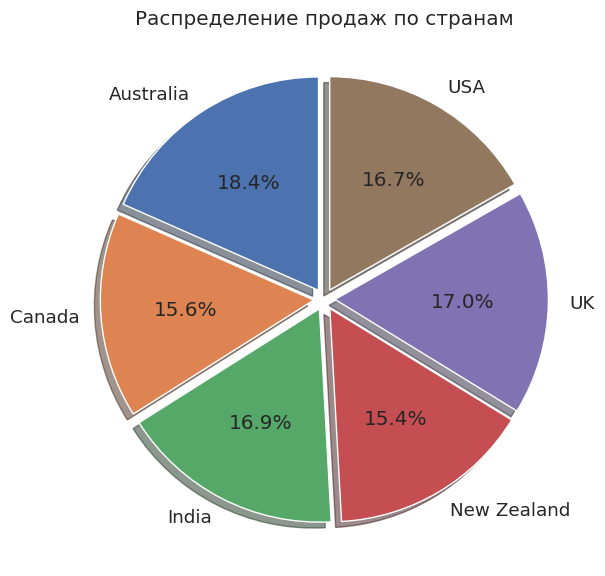

In [16]:
plt.figure(figsize=(10, 6))
country_totals = df.groupby('Country')['Amount'].sum()
plt.pie(country_totals, labels=country_totals.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05]*len(country_totals))
plt.title('Распределение продаж по странам')
plt.tight_layout()
plt.savefig('sales_by_country_pie.png')
plt.show() 
plt.close()

2. Топ-10 самых продаваемых продуктов

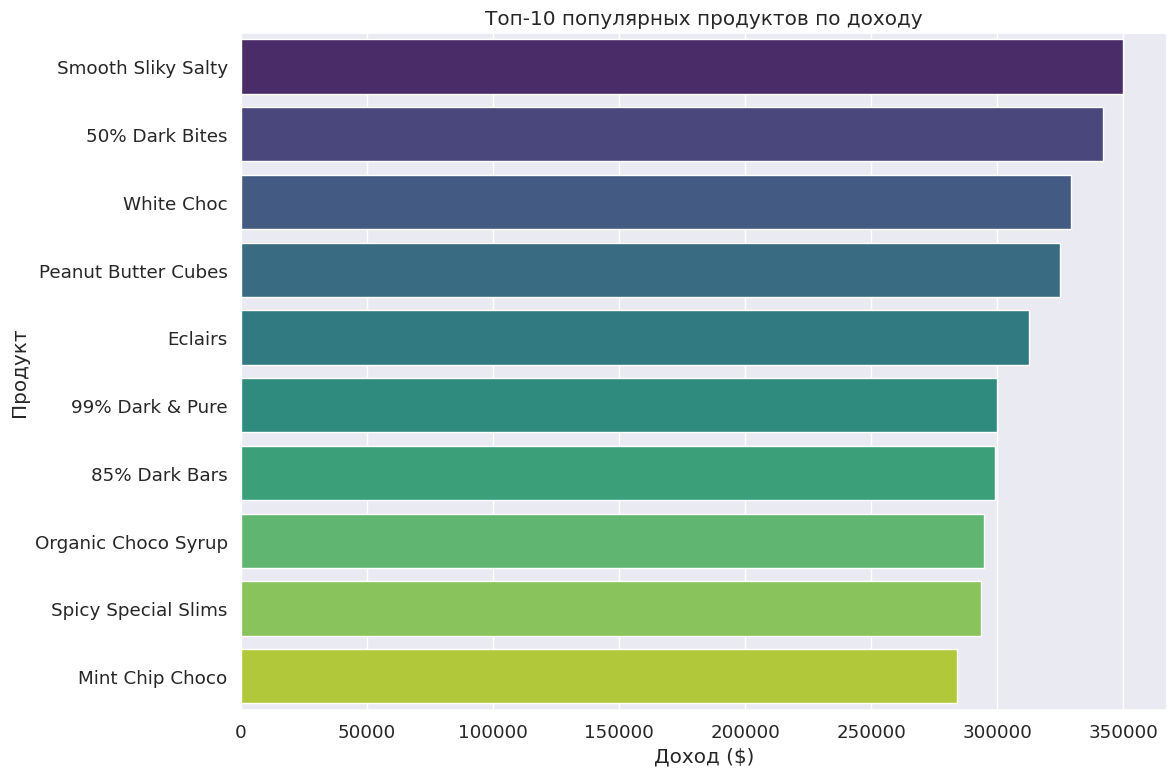

In [17]:
plt.figure(figsize=(12, 8))
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

top_products_df = pd.DataFrame({'Product': top_products.index, 'Amount': top_products.values})

sns.barplot(x='Amount', y='Product', hue='Product', data=top_products_df, palette='viridis', legend=False)
plt.title('Топ-10 популярных продуктов по доходу')
plt.xlabel('Доход ($)')
plt.ylabel('Продукт')
plt.tight_layout()
plt.savefig('top_products_by_revenue.png')
plt.show()
plt.close()

3. Сезонность продаж по категориям 

<Figure size 1400x800 with 0 Axes>

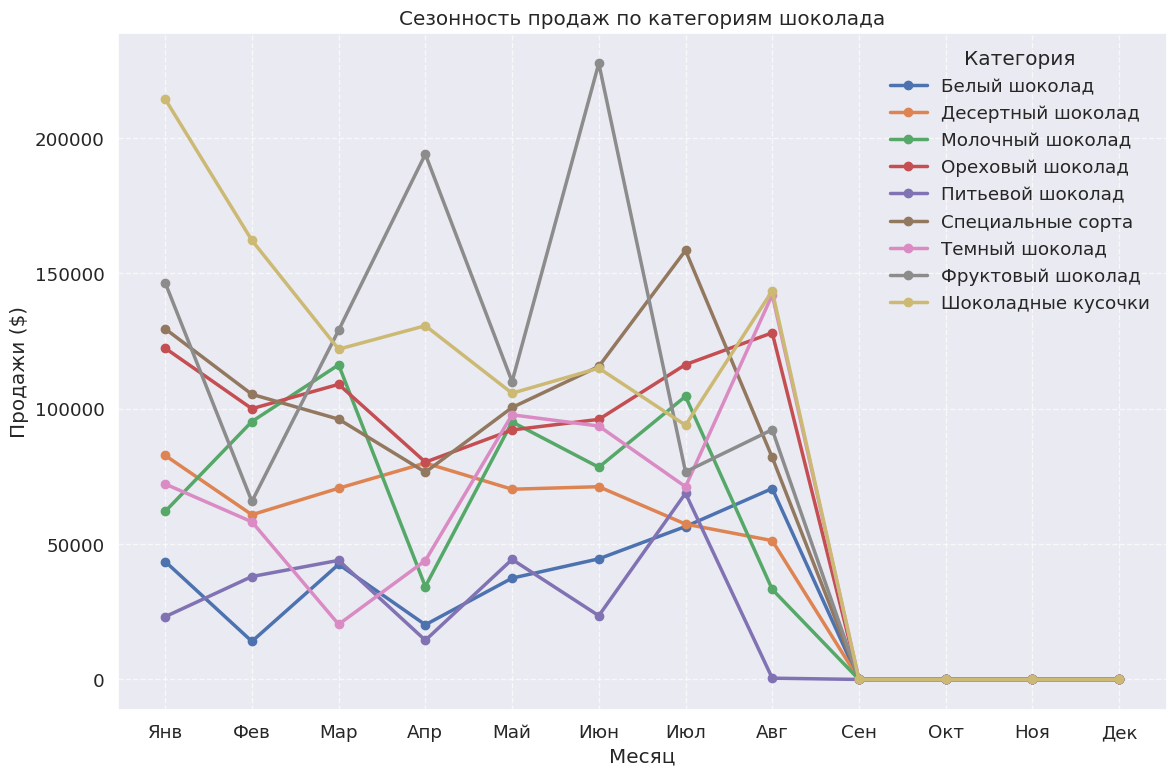

In [18]:
plt.figure(figsize=(14, 8))
monthly_category_sales = df.groupby(['Month', 'Category'])['Amount'].sum().reset_index()
pivot_df = monthly_category_sales.pivot(index='Month', columns='Category', values='Amount')

pivot_df = pivot_df.reindex(range(1, 13))

pivot_df = pivot_df.fillna(0)

pivot_df.plot(marker='o', linewidth=2.5)
plt.title('Сезонность продаж по категориям шоколада')
plt.xlabel('Месяц')
plt.ylabel('Продажи ($)')
plt.xticks(range(1, 13), [months[i] for i in range(1, 13)])
plt.legend(title='Категория')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('sales_seasonality_by_category.png')
plt.show() 
plt.close()

4. Тепловая карта популярности продуктов по странам

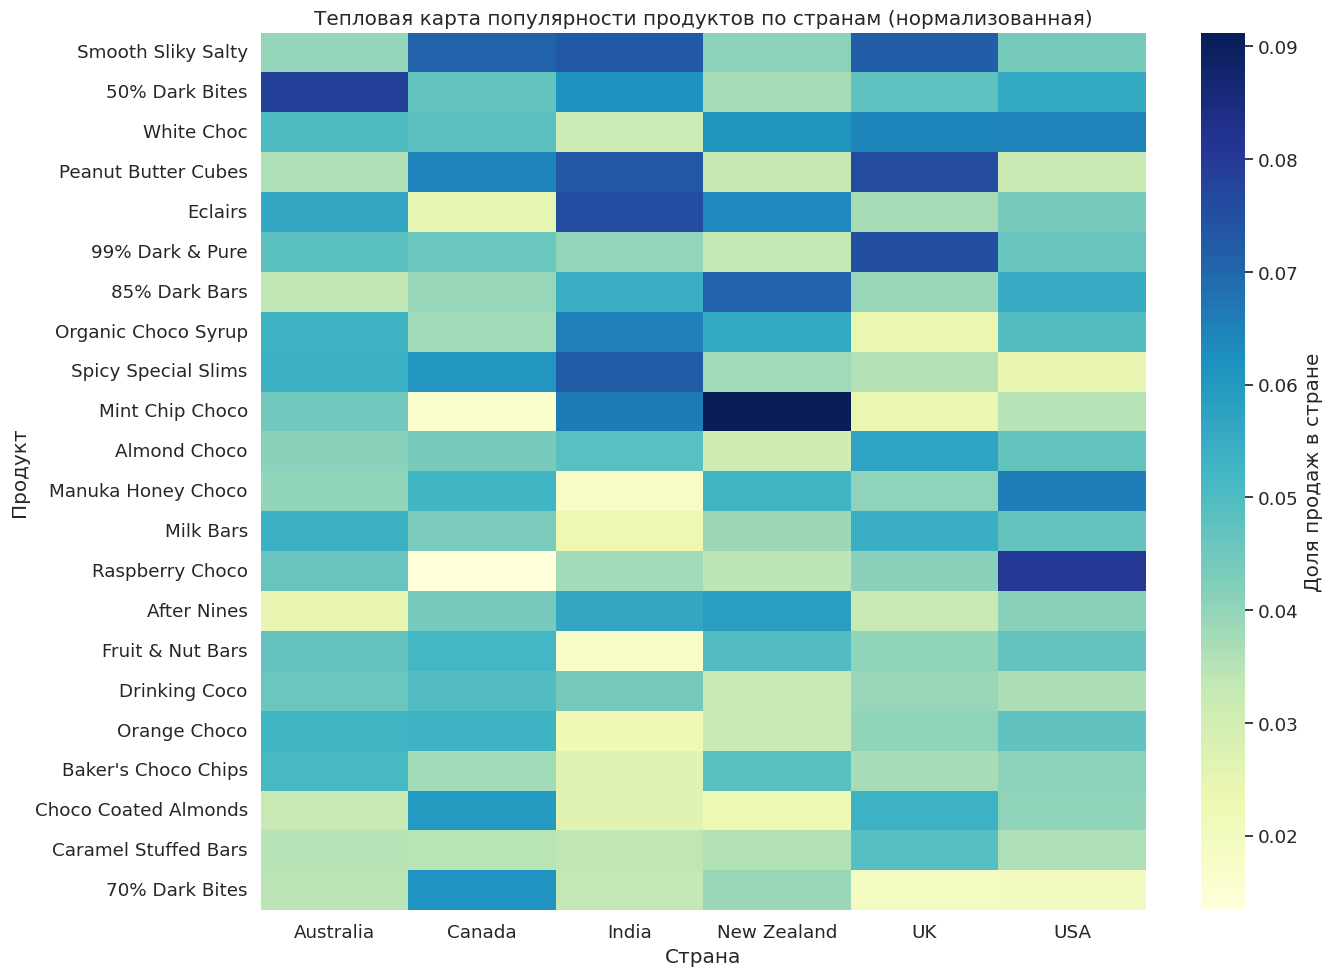

In [19]:
plt.figure(figsize=(14, 10))
product_country_sales = df.pivot_table(
    values='Amount', 
    index='Product', 
    columns='Country', 
    aggfunc='sum',
    fill_value=0
)

# Нормализация данных
normalized_data = product_country_sales.div(product_country_sales.sum(axis=0), axis=1)

# Сортировка по общей сумме продаж
product_totals = product_country_sales.sum(axis=1)
sorted_indices = product_totals.sort_values(ascending=False).index
normalized_data = normalized_data.loc[sorted_indices]

sns.heatmap(normalized_data, cmap='YlGnBu', annot=False, fmt='.2%', cbar_kws={'label': 'Доля продаж в стране'})
plt.title('Тепловая карта популярности продуктов по странам (нормализованная)')
plt.ylabel('Продукт')
plt.xlabel('Страна')
plt.tight_layout()
plt.savefig('product_country_heatmap.png')
plt.show() 
plt.close()

5. Визуализация рыночных тенденций - матрица корреляции между странами

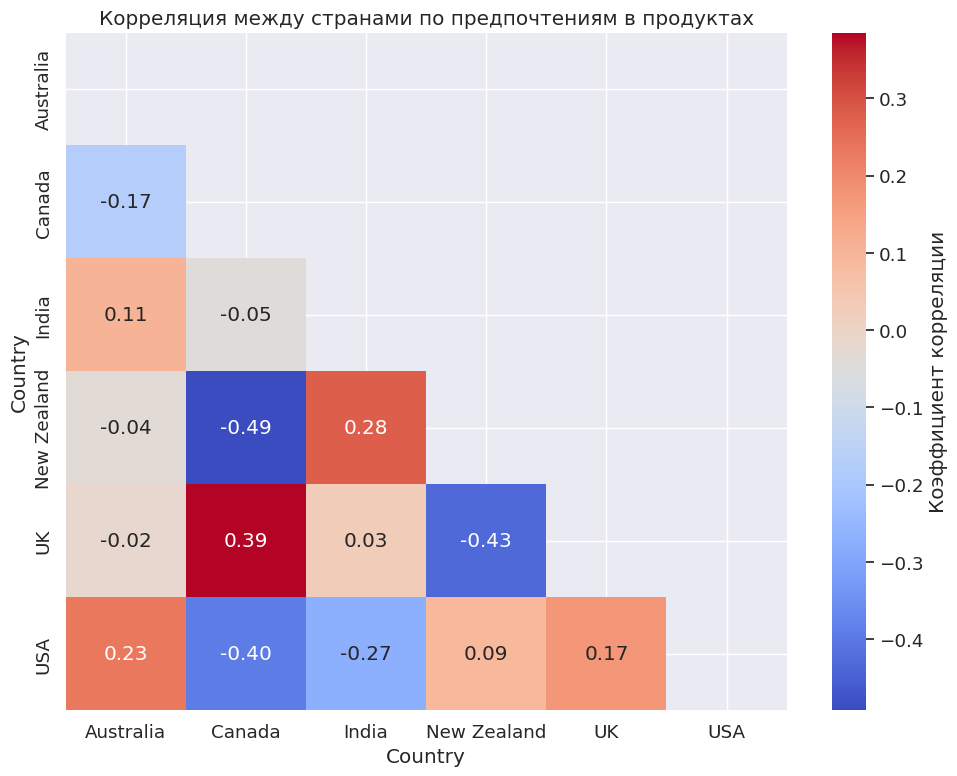

In [20]:
plt.figure(figsize=(10, 8))
country_product_matrix = df.pivot_table(
    values='Amount', 
    index='Country', 
    columns='Product', 
    aggfunc='sum',
    fill_value=0
)

# Корреляция между странами по популярности
corr_matrix = country_product_matrix.T.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, 
            cbar_kws={'label': 'Коэффициент корреляции'})
plt.title('Корреляция между странами по предпочтениям в продуктах')
plt.tight_layout()
plt.savefig('country_correlation_heatmap.png')
plt.show()
plt.close()

6. Средний размер заказа по странам и категориям

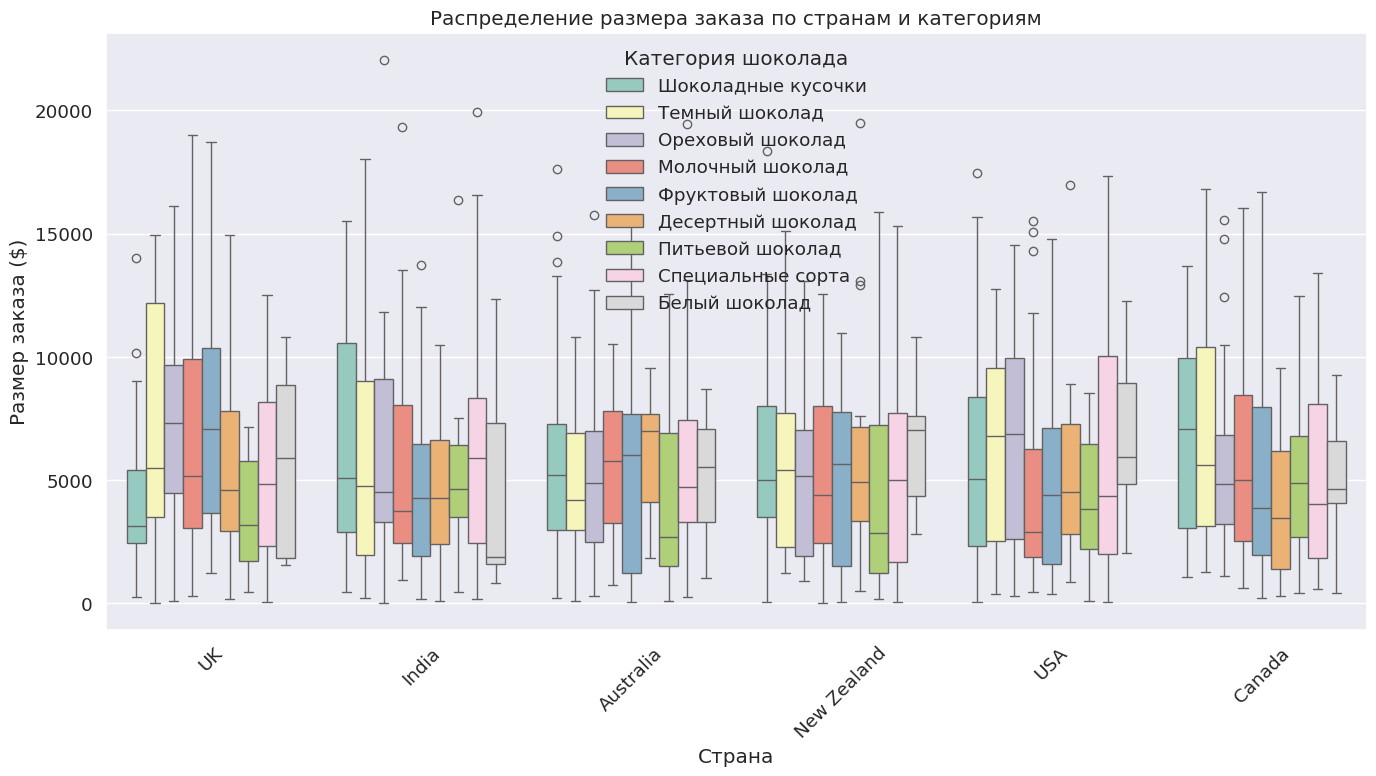

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Amount', hue='Category', data=df, palette='Set3')
plt.title('Распределение размера заказа по странам и категориям')
plt.xlabel('Страна')
plt.ylabel('Размер заказа ($)')
plt.xticks(rotation=45)
plt.legend(title='Категория шоколада')
plt.tight_layout()
plt.savefig('order_size_by_country_category.png')
plt.show() 
plt.close()

7. Изменение объема продаж по месяцам для топ-3 стран

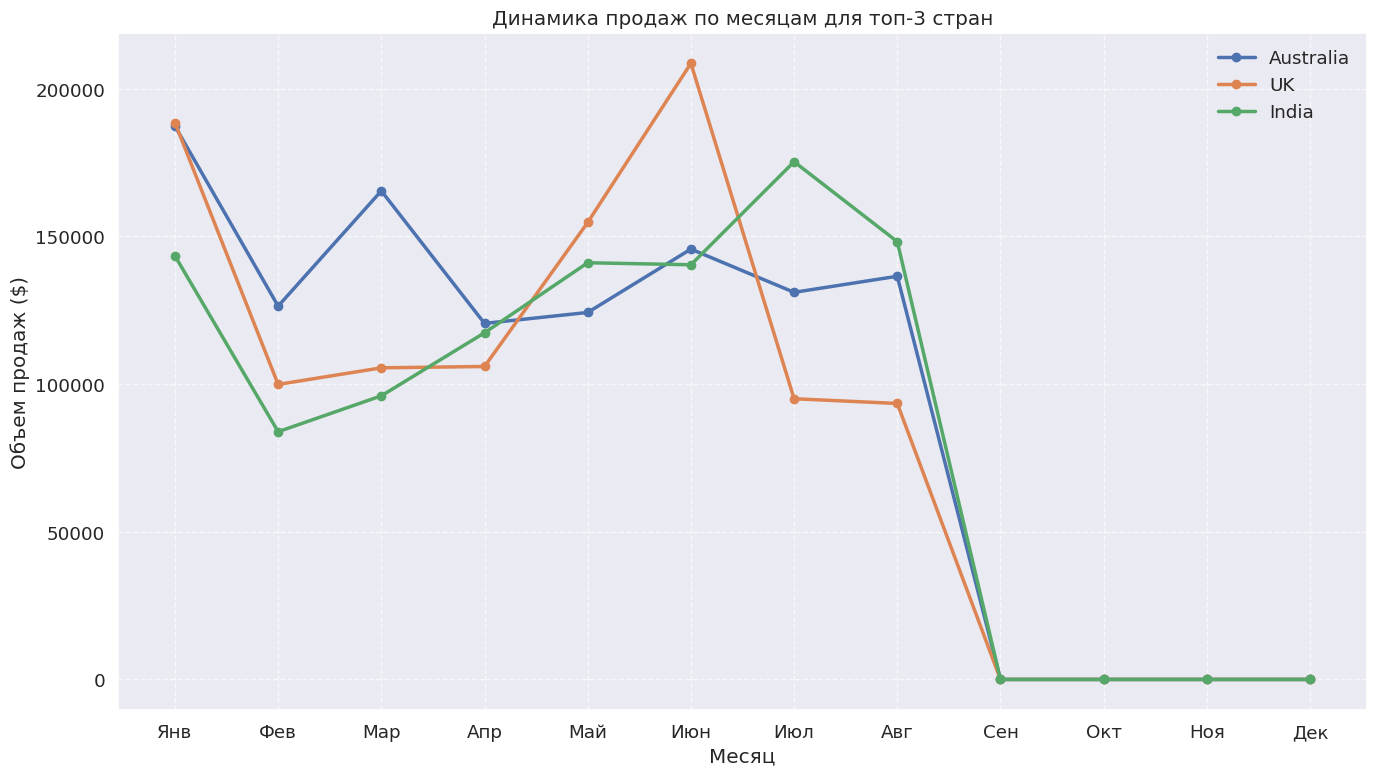

In [23]:
top3_countries = country_sales.sort_values('Общий доход', ascending=False).index[:3]
plt.figure(figsize=(14, 8))

for country in top3_countries:
    country_data = df[df['Country'] == country]
    monthly_sales = country_data.groupby('Month')['Amount'].sum()
    # Заполняем пропущенные месяцы нулями
    monthly_sales = monthly_sales.reindex(range(1, 13), fill_value=0)
    plt.plot(range(1, 13), monthly_sales, marker='o', linewidth=2.5, label=country)

plt.title('Динамика продаж по месяцам для топ-3 стран')
plt.xlabel('Месяц')
plt.ylabel('Объем продаж ($)')
plt.xticks(range(1, 13), [months[i] for i in range(1, 13)])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_top3_countries.png')
plt.show()  
plt.close()

8. Соотношение категорий продуктов

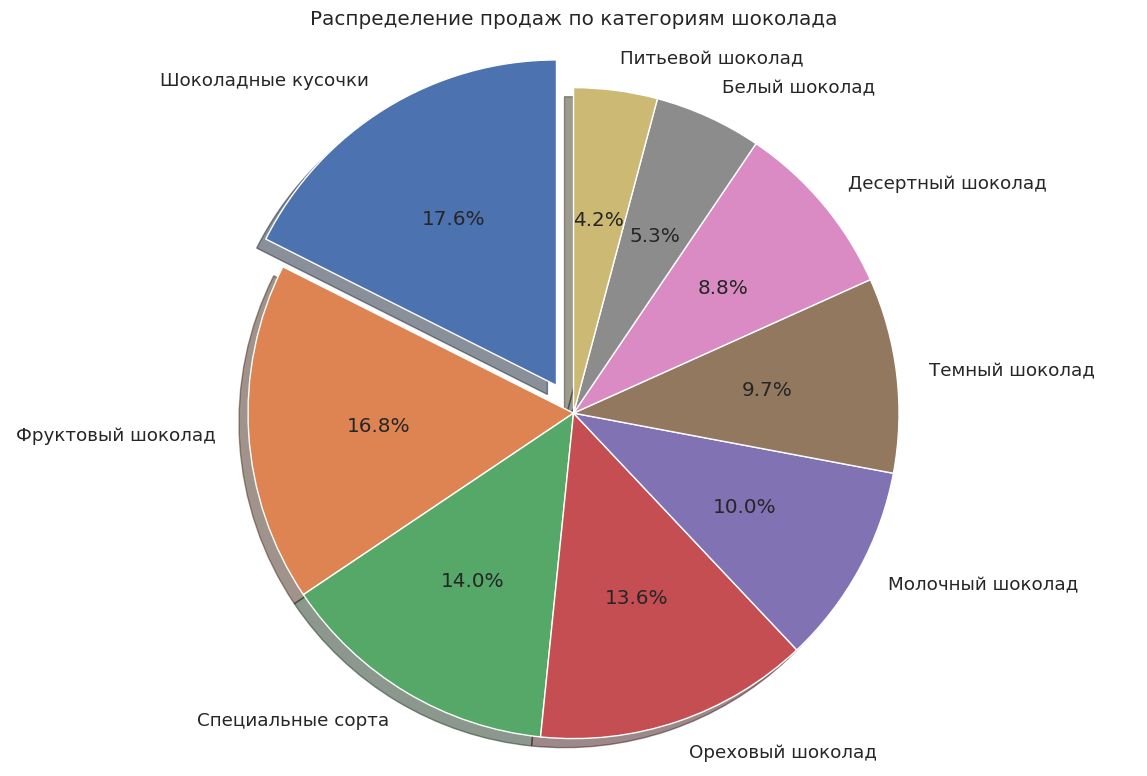

In [24]:
plt.figure(figsize=(12, 8))
category_totals = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
explode = [0.1] + [0] * (len(category_totals) - 1)  # Выделим самую крупную категорию
plt.pie(category_totals, labels=category_totals.index, autopct='%1.1f%%', 
        startangle=90, explode=explode, shadow=True)
plt.title('Распределение продаж по категориям шоколада')
plt.axis('equal')  # Круговая диаграмма будет круглой
plt.tight_layout()
plt.savefig('sales_by_category_pie.png')
plt.show() 
plt.close()

ВЫВОДЫ ПО АНАЛИЗУ:

In [26]:
print("1. Наиболее прибыльные рынки:", ", ".join(country_sales.sort_values('Общий доход', ascending=False).index[:3].tolist()))
print("2. Самые популярные продукты в мире:", ", ".join(top_products.index[:3].tolist()))
print("3. Категории с наибольшими продажами:", ", ".join(category_totals.index[:2].tolist()))

1. Наиболее прибыльные рынки: Australia, UK, India
2. Самые популярные продукты в мире: Smooth Sliky Salty, 50% Dark Bites, White Choc
3. Категории с наибольшими продажами: Шоколадные кусочки, Фруктовый шоколад
